##### Exercise: Constraint optimization problem

$$ \min_{a,b>0} \int_0^1 (f(z) - \beta(z|a,b))^2 \;dz$$

where

- $Z = XY$
- $f(z)=\int_z^1 f_Y(y)f_X(z/y) \frac{1}{y} \;dy$
- $X \sim \beta(a_1,b_1)$ and $Y \sim \beta(a_2, b_2)$

Test the following cases: 
- $(a_1, b_1) = (a_2, b_2)=(2, 2)$
- $(a_1, b_1)=(9, 2), \; (a_2, b_2)=(9, 2)$ 

C:\Users\ccw\AppData\Local\Temp\ipykernel_28740\475353197.py:13: RuntimeWarning: invalid value encountered in divide
  integrand = beta.pdf(x, a, b) * beta.pdf(zi / x, a, b) / x
C:\Users\ccw\AppData\Local\Temp\ipykernel_28740\475353197.py:15: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  pdf_z[i] = np.trapz(integrand, x)
C:\Users\ccw\AppData\Local\Temp\ipykernel_28740\475353197.py:13: RuntimeWarning: divide by zero encountered in divide
  integrand = beta.pdf(x, a, b) * beta.pdf(zi / x, a, b) / x


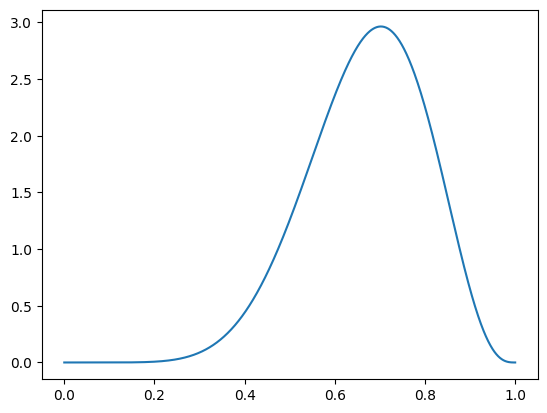

In [3]:
# Draw the pdf of Z=XY, where X and Y are independent beta random variables with parameters a and b
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

def beta_product_pdf(z, a, b, num_points=1000):
    """Compute the PDF of Z = XY where X and Y are independent Beta(a, b) random variables."""
    pdf_z = np.zeros_like(z)
    x = np.linspace(0, 1, num_points)
    dx = x[1] - x[0]
    
    for i, zi in enumerate(z):
        integrand = beta.pdf(x, a, b) * beta.pdf(zi / x, a, b) / x
        integrand[x == 0] = 0  # Avoid division by zero
        pdf_z[i] = np.trapz(integrand, x)
    
    return pdf_z

z = np.linspace(0, 1, 1000)
pdf_z = beta_product_pdf(z, 9, 2)
plt.plot(z, pdf_z)
plt.show()